In [263]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [24]:
dfl = pd.read_json('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/ultimate_challenge/logins.json', orient='columns')




In [25]:
dfl.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [14]:
dfl.columns

Index(['login_time'], dtype='object')

In [15]:
df = dfl

In [17]:
df2 = dfl

In [21]:
dfl.set_index('login_time', inplace = True)
dfl['count'] = 1
dfl.resample('15T', how = sum).head()


//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  app.launch_new_instance()


,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [211]:
with open('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/ultimate_challenge/ultimate_data_challenge.json') as f:
    
    data = json.load(f)
    

In [212]:
mpd = pd.DataFrame(data)

In [213]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [112]:
#check if the user is active or not
mpd.dtypes

avg_dist                          float64
avg_rating_by_driver              float64
avg_rating_of_driver              float64
avg_surge                         float64
city                               object
last_trip_date                     object
phone                              object
signup_date                        object
surge_pct                         float64
trips_in_first_30_days              int64
ultimate_black_user                  bool
weekday_pct                       float64
last_trip_date_dt          datetime64[ns]
signup_date_dt             datetime64[ns]
date_diff                 timedelta64[ns]
daysdiffnum                       float64
active                            float64
dtype: object

In [214]:
mpd['last_trip_date_dt'] = pd.to_datetime(mpd['last_trip_date'])

In [41]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15


In [215]:
mpd['signup_date_dt'] = pd.to_datetime(mpd['signup_date'])

In [43]:
mpd.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date                    object
phone                             object
signup_date                       object
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
last_trip_date_dt         datetime64[ns]
signup_date_dt            datetime64[ns]
dtype: object

In [49]:
mpd.iloc[0]

avg_dist                                 3.67
avg_rating_by_driver                        5
avg_rating_of_driver                      4.7
avg_surge                                 1.1
city                           King's Landing
last_trip_date                     2014-06-17
phone                                  iPhone
signup_date                        2014-01-25
surge_pct                                15.4
trips_in_first_30_days                      4
ultimate_black_user                      True
weekday_pct                              46.2
last_trip_date_dt         2014-06-17 00:00:00
signup_date_dt            2014-01-25 00:00:00
Name: 0, dtype: object

In [55]:
diff2 = (mpd.iloc[0].last_trip_date_dt-mpd.iloc[0].signup_date_dt).days

In [56]:
diff2

143

In [52]:
diff.days

143

In [216]:
mpd['date_diff'] = mpd.last_trip_date_dt-mpd.signup_date_dt

In [68]:
mpd.iloc[0]

avg_dist                                 3.67
avg_rating_by_driver                        5
avg_rating_of_driver                      4.7
avg_surge                                 1.1
city                           King's Landing
last_trip_date                     2014-06-17
phone                                  iPhone
signup_date                        2014-01-25
surge_pct                                15.4
trips_in_first_30_days                      4
ultimate_black_user                      True
weekday_pct                              46.2
last_trip_date_dt         2014-06-17 00:00:00
signup_date_dt            2014-01-25 00:00:00
date_diff                   143 days 00:00:00
Name: 0, dtype: object

In [217]:
#daysdiffnum = difference in days between 'Sign up date' and 'last trip date'
for index, row in mpd.iterrows():
           daysdiff = row['date_diff'].days
           mpd.loc[index,'daysdiffnum']=daysdiff
        

In [103]:
mpd.iloc[0]

avg_dist                                 3.67
avg_rating_by_driver                        5
avg_rating_of_driver                      4.7
avg_surge                                 1.1
city                           King's Landing
last_trip_date                     2014-06-17
phone                                  iPhone
signup_date                        2014-01-25
surge_pct                                15.4
trips_in_first_30_days                      4
ultimate_black_user                      True
weekday_pct                              46.2
last_trip_date_dt         2014-06-17 00:00:00
signup_date_dt            2014-01-25 00:00:00
date_diff                   143 days 00:00:00
daysdiffnum                               143
Name: 0, dtype: object

In [218]:
for index, row in mpd.iterrows():
        if row['trips_in_first_30_days'] >= 1:
                mpd.loc[index,'active']=1 
        else:
                mpd.loc[index,'active']=0
        

In [105]:
not_retained = mpd.loc[mpd['active']==0,:]

In [176]:
not_retained = note_retained['active'].count()

In [177]:
not_retained

15390

In [178]:
total_active = mpd['active'].count()

In [179]:
total_active

50000

In [180]:
retained_fraction = (total_active-not_retained)/(total_active)

In [181]:
retained_fraction

0.69220000000000004

### Retention Rate = 69%

In [84]:
mpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
last_trip_date_dt         50000 non-null datetime64[ns]
signup_date_dt            50000 non-null datetime64[ns]
date_diff                 50000 non-null timedelta64[ns]
daysdiffnum               50000 non-null float64
active                    50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(8

In [219]:
for index, row in mpd.iterrows():
        if row['daysdiffnum'] >= 180:
                mpd.loc[index,'active_after_sixmnth']=1 
        else:
                mpd.loc[index,'active_after_sixmnth']=0
        

In [87]:
mpd.iloc[7]

avg_dist                                 2.04
avg_rating_by_driver                        5
avg_rating_of_driver                        5
avg_surge                                   1
city                               Winterfell
last_trip_date                     2014-01-29
phone                                  iPhone
signup_date                        2014-01-28
surge_pct                                   0
trips_in_first_30_days                      2
ultimate_black_user                     False
weekday_pct                               100
last_trip_date_dt         2014-01-29 00:00:00
signup_date_dt            2014-01-28 00:00:00
date_diff                     1 days 00:00:00
daysdiffnum                                 1
active                                      1
active_after_sixmnth                        0
Name: 7, dtype: object

In [267]:
six_month_active = mpd.loc[mpd['active_after_sixmnth']==1,:]

In [271]:
six_month_active_cnt = six_month_active['active_after_sixmnth'].count()

In [272]:
fraction_of_user_active_sixmonths = six_month_active_cnt/(total_active)

In [273]:
fraction_of_user_active_sixmonths

0.0016999999999999999

In [220]:

for index, row in mpd.iterrows():
            dt = row['signup_date_dt']
            mpd.loc[index,'signup_day_of_week'] = dt.weekday()
            
        

In [141]:
'''


for index, row in mpd.iterrows():
            dt = row['signup_date_dt']
            mpd.loc[index,'signup_month_of_year'] = dt.month
'''            
        


In [185]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt,signup_date_dt,date_diff,daysdiffnum,active,active_after_sixmnth,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,2014-01-25,143 days,143.0,1.0,0.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,2014-01-29,96 days,96.0,0.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,2014-01-06,1 days,1.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,2014-01-10,170 days,170.0,1.0,0.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,2014-01-27,47 days,47.0,1.0,0.0,0.0


#### Avg_rating_by_driver 

In [113]:
mpd.avg_rating_by_driver.unique()

array([ 5. ,  4.9,  4. ,  3. ,  4.8,  4.7,  4.5,  4.2,  nan,  4.4,  4.6,
        3.7,  4.3,  3.5,  2. ,  3.8,  2.5,  4.1,  3.9,  1. ,  3.3,  3.4,
        3.6,  3.2,  2.3,  2.8,  1.5,  2.7])

In [114]:
mpd.loc[mpd['avg_rating_by_driver'].isnull(),:]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt,signup_date_dt,date_diff,daysdiffnum,active
90,6.28,NaN,5.0,1.00,Winterfell,2014-02-09,iPhone,2014-01-10,0.0,1,False,0.0,2014-02-09,2014-01-10,30 days,30.0,1.0
274,6.00,NaN,2.0,4.00,Astapor,2014-02-09,iPhone,2014-01-25,100.0,1,False,0.0,2014-02-09,2014-01-25,15 days,15.0,1.0
277,1.82,NaN,NaN,1.00,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,False,0.0,2014-01-26,2014-01-25,1 days,1.0,1.0
536,1.41,NaN,5.0,1.00,Winterfell,2014-02-08,Android,2014-01-18,0.0,1,False,100.0,2014-02-08,2014-01-18,21 days,21.0,1.0
857,0.42,NaN,4.0,1.00,Winterfell,2014-03-16,iPhone,2014-01-11,0.0,0,False,0.0,2014-03-16,2014-01-11,64 days,64.0,0.0
1021,2.33,NaN,NaN,1.75,King's Landing,2014-06-13,iPhone,2014-01-23,100.0,0,True,100.0,2014-06-13,2014-01-23,141 days,141.0,0.0
1073,9.21,NaN,5.0,1.00,King's Landing,2014-04-27,Android,2014-01-19,0.0,0,False,0.0,2014-04-27,2014-01-19,98 days,98.0,0.0
1164,2.57,NaN,2.0,1.00,Winterfell,2014-01-25,Android,2014-01-24,0.0,1,True,100.0,2014-01-25,2014-01-24,1 days,1.0,1.0
1181,24.91,NaN,3.0,1.00,Winterfell,2014-01-25,Android,2014-01-25,0.0,1,False,0.0,2014-01-25,2014-01-25,0 days,0.0,1.0
1205,8.94,NaN,NaN,1.00,Winterfell,2014-02-22,Android,2014-01-18,0.0,0,False,100.0,2014-02-22,2014-01-18,35 days,35.0,0.0


In [221]:
mpd['avg_rating_by_driver']=mpd['avg_rating_by_driver'].fillna(round(mpd['avg_rating_by_driver'].mean(),2))

In [187]:
mpd.avg_rating_by_driver.unique()

array([ 5.  ,  4.9 ,  4.  ,  3.  ,  4.8 ,  4.7 ,  4.5 ,  4.2 ,  4.78,
        4.4 ,  4.6 ,  3.7 ,  4.3 ,  3.5 ,  2.  ,  3.8 ,  2.5 ,  4.1 ,
        3.9 ,  1.  ,  3.3 ,  3.4 ,  3.6 ,  3.2 ,  2.3 ,  2.8 ,  1.5 ,  2.7 ])

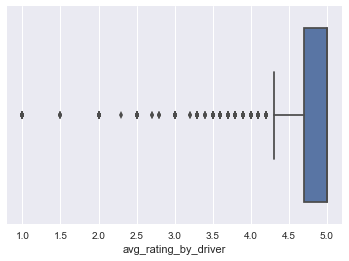

In [129]:
sns.boxplot(x='avg_rating_by_driver', data=mpd)

#### avg_dist

In [130]:
mpd.avg_dist.unique()

array([  3.67,   8.26,   0.77, ...,  38.72,  27.47,  30.39])

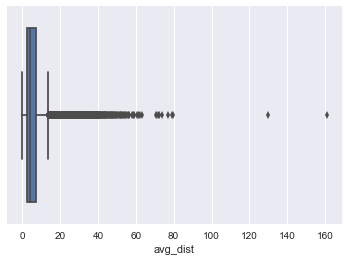

In [131]:
sns.boxplot(x='avg_dist', data=mpd)

In [132]:
mpd.loc[mpd['avg_dist'].isnull(),:]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt,signup_date_dt,date_diff,daysdiffnum,active,active_after_sixmnth


#### Avg_rating_of_driver

In [133]:
mpd.avg_rating_of_driver.unique()

array([ 4.7,  5. ,  4.3,  4.6,  4.4,  3.5,  nan,  4.5,  4. ,  3.9,  4.9,
        4.8,  2.5,  3.7,  1. ,  4.1,  4.2,  3. ,  3.8,  2. ,  2.7,  3.3,
        2.8,  3.6,  3.4,  3.2,  2.6,  3.1,  2.9,  1.7,  1.8,  1.5,  2.3,
        1.9,  2.1,  2.4,  1.6,  2.2])

In [222]:
mpd['avg_rating_of_driver']=mpd['avg_rating_of_driver'].fillna(round(mpd['avg_rating_of_driver'].mean(),2))

In [189]:
mpd.avg_rating_of_driver.unique()

array([ 4.7,  5. ,  4.3,  4.6,  4.4,  3.5,  4.5,  4. ,  3.9,  4.9,  4.8,
        2.5,  3.7,  1. ,  4.1,  4.2,  3. ,  3.8,  2. ,  2.7,  3.3,  2.8,
        3.6,  3.4,  3.2,  2.6,  3.1,  2.9,  1.7,  1.8,  1.5,  2.3,  1.9,
        2.1,  2.4,  1.6,  2.2])

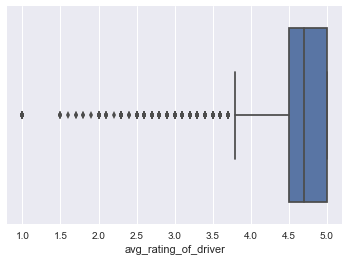

In [136]:
sns.boxplot(x='avg_rating_of_driver', data=mpd)

#### Avg_Surge

In [143]:
mpd.avg_surge.unique()

array([ 1.1 ,  1.  ,  1.14,  1.19,  1.38,  1.21,  1.17,  1.02,  1.05,
        1.5 ,  2.  ,  1.25,  1.04,  1.88,  1.33,  1.56,  1.06,  1.03,
        1.09,  1.35,  3.5 ,  1.11,  1.63,  2.5 ,  1.32,  1.3 ,  1.75,
        2.25,  1.2 ,  1.13,  1.08,  1.15,  4.  ,  1.12,  1.22,  1.29,
        1.23,  1.01,  1.07,  1.18,  1.45,  2.75,  2.63,  1.46,  2.07,
        1.27,  3.  ,  1.36,  1.96,  1.42,  1.44,  1.54,  1.16,  1.31,
        1.58,  1.92,  1.67,  1.26,  4.75,  1.41,  3.25,  1.24,  2.13,
        1.6 ,  1.57,  1.34,  1.52,  1.69,  5.  ,  1.4 ,  1.37,  1.7 ,
        1.78,  1.43,  1.94,  1.64,  1.83,  1.28,  1.85,  1.55,  1.48,
        1.39,  2.88,  4.25,  1.47,  1.51,  1.9 ,  1.68,  4.5 ,  1.66,
        2.33,  1.65,  1.71,  2.17,  2.38,  1.61,  2.08,  3.75,  8.  ,
        1.77,  1.49,  2.42,  1.59,  1.8 ,  2.19,  1.53,  1.81,  5.75,
        1.79,  2.44,  2.67,  2.31,  2.1 ,  2.2 ,  3.63])

#### City

In [144]:
mpd.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [145]:
mpd.last_trip_date.unique()

array(['2014-06-17', '2014-05-05', '2014-01-07', '2014-06-29',
       '2014-03-15', '2014-06-06', '2014-01-25', '2014-01-29',
       '2014-02-01', '2014-01-05', '2014-05-30', '2014-01-10',
       '2014-03-12', '2014-06-08', '2014-01-28', '2014-01-16',
       '2014-06-28', '2014-07-01', '2014-06-24', '2014-06-03',
       '2014-03-16', '2014-04-29', '2014-05-02', '2014-06-13',
       '2014-05-18', '2014-01-03', '2014-01-22', '2014-03-05',
       '2014-02-27', '2014-02-07', '2014-06-14', '2014-06-10',
       '2014-02-28', '2014-01-17', '2014-02-21', '2014-06-25',
       '2014-04-26', '2014-06-30', '2014-06-23', '2014-05-10',
       '2014-01-26', '2014-03-17', '2014-06-18', '2014-04-19',
       '2014-01-19', '2014-06-19', '2014-02-15', '2014-06-01',
       '2014-05-16', '2014-06-15', '2014-03-10', '2014-04-20',
       '2014-03-29', '2014-02-02', '2014-05-09', '2014-05-04',
       '2014-03-19', '2014-04-23', '2014-01-01', '2014-01-08',
       '2014-04-27', '2014-01-30', '2014-02-03', '2014-

#### Phone

In [146]:
mpd.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

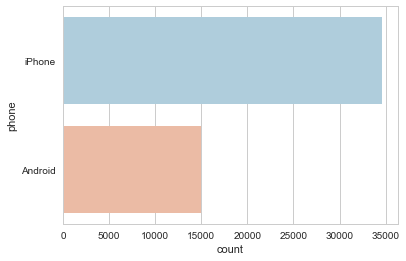

In [147]:
sns.set_style('whitegrid')
sns.countplot(y=mpd['phone'],data=mpd,palette='RdBu_r')

#### Signup_date

In [148]:
mpd.signup_date.unique()

array(['2014-01-25', '2014-01-29', '2014-01-06', '2014-01-10',
       '2014-01-27', '2014-01-09', '2014-01-24', '2014-01-28',
       '2014-01-21', '2014-01-03', '2014-01-13', '2014-01-15',
       '2014-01-11', '2014-01-12', '2014-01-02', '2014-01-31',
       '2014-01-19', '2014-01-16', '2014-01-26', '2014-01-05',
       '2014-01-17', '2014-01-22', '2014-01-18', '2014-01-20',
       '2014-01-04', '2014-01-30', '2014-01-07', '2014-01-01',
       '2014-01-08', '2014-01-23', '2014-01-14'], dtype=object)

#### Surge_pct

In [149]:
mpd.surge_pct.unique()

array([  15.4,    0. ,   20. ,   11.8,   50. ,   30.8,   33.3,    9.1,
        100. ,    5.8,   22.2,   25. ,    5.4,   10.5,   36. ,   18.2,
          5.3,    1.9,   10. ,   16.7,   15.9,   11.1,    8.3,    2.3,
          3.8,   21.4,   22.9,    3.5,   14.3,   66.7,    2.7,   26.1,
          7.1,    7.7,    4.9,   12.5,   42.9,   17.6,   14.8,   27.3,
         20.9,    1.7,   11.7,   13. ,    8.6,    3. ,    6.5,   40. ,
         21.1,    8.1,   10.1,   15.8,    2.4,   36.6,   71.4,    3.7,
          2. ,    5.7,   61.5,    4.3,   34.8,    3.6,   18.8,    7.5,
          6.3,    6.7,   13.5,   19.7,    4.2,   57.1,   14. ,    4.5,
         24.7,    0.9,    5. ,    3.3,   22.6,   12. ,    4.8,   15. ,
         37.5,    5.9,    8.5,    6.8,    2.9,   23.8,   28.6,    1.6,
         12.3,   10.3,   13.3,   27.1,   26.7,   13.6,   11.4,    8. ,
         38.5,    2.6,   17.2,    3.2,   21.7,    9.5,   19.4,   13.8,
         55.6,    8.8,    8.9,   16. ,   18. ,    7.9,    4. ,   23.1,
      

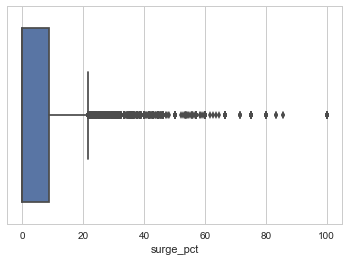

In [150]:
sns.boxplot(x='surge_pct', data=mpd)

#### trips_in_first_30_days

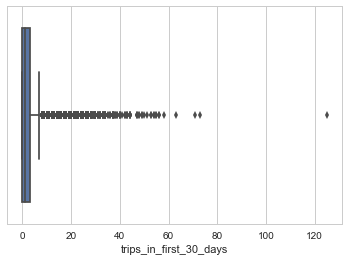

In [151]:
sns.boxplot(x='trips_in_first_30_days', data=mpd)

#### ultimate_black_user

In [160]:

mpd.ultimate_black_user.unique()

array([ True, False], dtype=bool)

#### weekday_pct

In [153]:
mpd.weekday_pct.unique()

array([  46.2,   50. ,  100. ,   80. ,   82.4,    0. ,   95.2,   80.8,
         66.7,   36.4,   25. ,   40. ,   61.6,   71.4,   52.4,   22.2,
         75. ,   54.1,   63.2,   84. ,   81.8,   67.6,   42.9,   55.2,
         76.9,   90. ,   89.7,   33.3,   63.6,   85.7,   88.9,   41.2,
         20. ,   37.5,   43.8,   45.5,   16.7,   41.7,   10. ,   57.5,
         57.7,   28.6,   62.9,   30. ,   69. ,   62.5,   83.8,   57.1,
         52.2,   72.2,   39.1,   46.3,   87.5,   83.3,   44.4,   55.6,
         69.2,   14.3,   76.5,   78.6,   88.3,   56.7,   70.9,   60. ,
         23.1,   65.2,   93.1,   64. ,   61.5,   12.5,    7.1,   79.2,
         54.8,   31. ,   92.9,   56.1,   46.7,   94.4,   91.9,   84.2,
         71.1,   61.9,   70. ,   70.6,   94.7,   21.4,   92.6,    7.7,
         51.3,   58.3,   77.8,   74.3,   47.4,   84.6,   56.5,   47.8,
         60.7,   31.3,   77.1,   90.9,   81.3,   88.2,   82.5,   53.3,
         71.6,   49.3,   54.2,   91.7,   84.9,   54.5,   73.3,   68.9,
      

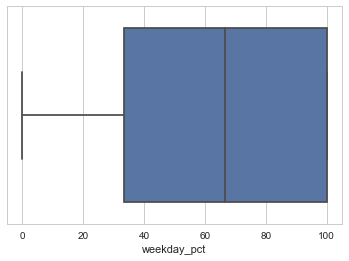

In [154]:
sns.boxplot(x='weekday_pct', data=mpd)

In [223]:
mpd_orig = mpd

In [224]:
mpd.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,date_diff,daysdiffnum,active,active_after_sixmnth,signup_day_of_week
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778166,4.601306,1.074764,8.849536,2.278200,60.926084,92 days 18:57:44.640000,92.790100,0.692200,0.001700,3.309620
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,62 days 03:06:56.580842,62.129822,0.461588,0.041196,1.880666
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27 days 00:00:00,27.000000,0.000000,0.000000,2.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,110 days 00:00:00,110.000000,1.000000,0.000000,4.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150 days 00:00:00,150.000000,1.000000,0.000000,5.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181 days 00:00:00,181.000000,1.000000,1.000000,6.000000


####  We will drop Categorical variable 'Phone' and will keep the variable 'City'


In [225]:
mpd_final_one = mpd.drop(['phone'],axis=1)

In [226]:
mpd_final_one = mpd_final_one.drop(['date_diff'],axis=1)

In [192]:
mpd_final_one.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt,signup_date_dt,daysdiffnum,active,active_after_sixmnth,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,2014-01-25,15.4,4,True,46.2,2014-06-17,2014-01-25,143.0,1.0,0.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,2014-01-29,0.0,0,False,50.0,2014-05-05,2014-01-29,96.0,0.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,2014-01-06,0.0,3,False,100.0,2014-01-07,2014-01-06,1.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,2014-01-10,20.0,9,True,80.0,2014-06-29,2014-01-10,170.0,1.0,0.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,2014-01-27,11.8,14,False,82.4,2014-03-15,2014-01-27,47.0,1.0,0.0,0.0


In [227]:
#dropping the dates field
mpd_final_one = mpd_final_one.drop(['last_trip_date','signup_date','last_trip_date_dt','signup_date_dt'],axis=1)


In [228]:
mpd_final_one.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,True,46.2,143.0,1.0,0.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,False,50.0,96.0,0.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,False,100.0,1.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,True,80.0,170.0,1.0,0.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,False,82.4,47.0,1.0,0.0,0.0


In [193]:
mpd_final_one.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778166,4.601306,1.074764,8.849536,2.278200,60.926084,92.790100,0.692200,0.001700,3.309620
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,62.129822,0.461588,0.041196,1.880666
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27.000000,0.000000,0.000000,2.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,110.000000,1.000000,0.000000,4.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150.000000,1.000000,0.000000,5.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000,1.000000,6.000000


In [229]:
mpd_final = pd.get_dummies(mpd_final_one,drop_first=True)

In [230]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,143.0,1.0,0.0,5.0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,96.0,0.0,0.0,2.0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1.0,1.0,0.0,0.0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,170.0,1.0,0.0,4.0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,47.0,1.0,0.0,0.0,0,1


In [232]:

#converting boolean to string

booleandf = mpd_final.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

#loop by df is loop by columns, same as for column in booleandf.columns:
for column in booleandf:
    if column == 'ultimate_black_user':
        mpd_final[column] = mpd_final[column].map(booleanDictionary)


In [233]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,TRUE,46.2,143.0,1.0,0.0,5.0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,FALSE,50.0,96.0,0.0,0.0,2.0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,FALSE,100.0,1.0,1.0,0.0,0.0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,TRUE,80.0,170.0,1.0,0.0,4.0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,FALSE,82.4,47.0,1.0,0.0,0.0,0,1


In [234]:
#For 'ultimate_black_user' replacing True with '1' and False with '0'

mpd_final['ultimate_black_user_nm'] = mpd_final['ultimate_black_user'].map({'TRUE': 1, 'FALSE': 0})

In [235]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week,city_King's Landing,city_Winterfell,ultimate_black_user_nm
0,3.67,5.0,4.7,1.10,15.4,4,TRUE,46.2,143.0,1.0,0.0,5.0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,FALSE,50.0,96.0,0.0,0.0,2.0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,FALSE,100.0,1.0,1.0,0.0,0.0,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,TRUE,80.0,170.0,1.0,0.0,4.0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,FALSE,82.4,47.0,1.0,0.0,0.0,0,1,0


In [236]:
mpd_final = mpd_final.drop(['ultimate_black_user'],axis=1)

In [237]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week,city_King's Landing,city_Winterfell,ultimate_black_user_nm
0,3.67,5.0,4.7,1.10,15.4,4,46.2,143.0,1.0,0.0,5.0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,96.0,0.0,0.0,2.0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1.0,1.0,0.0,0.0,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,170.0,1.0,0.0,4.0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,47.0,1.0,0.0,0.0,0,1,0


In [238]:
mpd_final.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'daysdiffnum',
       'active', 'active_after_sixmnth', 'signup_day_of_week',
       'city_King's Landing', 'city_Winterfell', 'ultimate_black_user_nm'],
      dtype='object')

In [239]:
mpd_final.rename(columns={'city_King\'s Landing': 'city_KingsLanding'}, inplace=True)

In [240]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,daysdiffnum,active,active_after_sixmnth,signup_day_of_week,city_KingsLanding,city_Winterfell,ultimate_black_user_nm
0,3.67,5.0,4.7,1.10,15.4,4,46.2,143.0,1.0,0.0,5.0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,96.0,0.0,0.0,2.0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1.0,1.0,0.0,0.0,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,170.0,1.0,0.0,4.0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,47.0,1.0,0.0,0.0,0,1,0


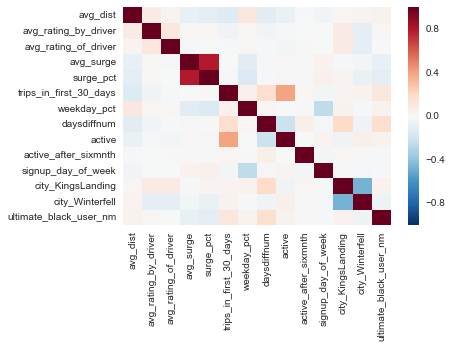

In [241]:
sns.heatmap(mpd_final.corr())

In [242]:
#removing the highly co-related features
#removing avg_surge and trips_in_first_30_days
mpd_final = mpd_final.drop(['avg_surge','trips_in_first_30_days'],axis=1)


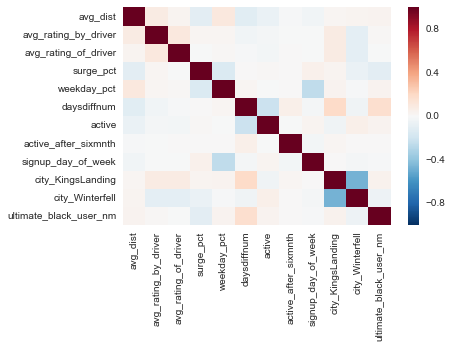

In [243]:
sns.heatmap(mpd_final.corr())

In [244]:
mpd_final.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
       'weekday_pct', 'daysdiffnum', 'active', 'active_after_sixmnth',
       'signup_day_of_week', 'city_KingsLanding', 'city_Winterfell',
       'ultimate_black_user_nm'],
      dtype='object')

In [274]:
dataset_Y = mpd_final['active_after_sixmnth']
dataset_X = mpd_final[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','surge_pct','weekday_pct','daysdiffnum','active','city_KingsLanding','city_Winterfell','ultimate_black_user_nm']]


In [275]:
import statsmodels.api as sm
logit = sm.Logit(dataset_Y, dataset_X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.010801
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     active_after_sixmnth   No. Observations:                50000
Model:                            Logit   Df Residuals:                    49990
Method:                             MLE   Df Model:                            9
Date:                  Mon, 30 Jul 2018   Pseudo R-squ.:                  0.1387
Time:                          23:54:19   Log-Likelihood:                -540.05
converged:                         True   LL-Null:                       -626.98
                                          LLR p-value:                 9.624e-33
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                  -0.0880      0.034     -2.552      0.011      -0.156      -0.020
avg_rating_by_driver      -1.3410      0.102    -13.118      0.000      -1.541      -1.141
avg_rating_of_driver      -0.9848      0.092    -10.757      0.000      -1.164      -0.805
surge_pct                 -0.0025      0.006     -0.422      0.673      -0.014       0.009
weekday_pct               -0.0085      0.003     -2.790      0.005      -0.014      -0.003
daysdiffnum                0.0393      0.004     10.640      0.000       0.032       0.047
active                    -0.2273      0.226     -1.007      0.314      -0.670       0.215
city_KingsLanding          0.4845      0.281      1.722      0.085      -0.067       1.036
city_Winterfell           -0.2831      0.262     -1.082      0.279      -0.796       0.230
ultimate_black_user_nm    -0.3327      0.218     -1.528      0.127      -0.760       0.094
==========================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X,dataset_Y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [278]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.998


In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     14978
        1.0       0.00      0.00      0.00        22

avg / total       1.00      1.00      1.00     15000



In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [259]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
 
    score = r2_score(y_true, y_predict)
 
    return score

In [256]:
def fit_model_rf(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0) #validation/holdout size=0.20

    #   Create a decision tree regressor object
    classifier = RandomForestClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth': range(1, 11),'max_leaf_nodes':[200,300],'n_estimators':[5,10,20]}
    
    params = {'max_depth': [2,4,8],'n_estimators':[10,50,100,150]}
    
    
    '''
       params = {
                'bootstrap': [True], #check with False
                'max_depth': [80, 90, 100, 110], # 2,4,8 small trees with random forest ,
                will give us overfitting with large trees, use very simple trees but many of them
                'max_features': [2, 3], # keep wide range , 10,100
                'min_samples_leaf': [3, 4, 5], #can avoid it
                'min_samples_split': [8, 10, 12], #use small numbers 4,40
                'n_estimators': [100, 200, 300, 1000] #this is important 10,50,100,150
                }

    
    '''
    

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search object
    grid = GridSearchCV(classifier, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [257]:
dataset_X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,weekday_pct,daysdiffnum,active,signup_day_of_week,city_KingsLanding,city_Winterfell,ultimate_black_user_nm
0,3.67,5.0,4.7,15.4,46.2,143.0,1.0,5.0,1,0,1
1,8.26,5.0,5.0,0.0,50.0,96.0,0.0,2.0,0,0,0
2,0.77,5.0,4.3,0.0,100.0,1.0,1.0,0.0,0,0,0
3,2.36,4.9,4.6,20.0,80.0,170.0,1.0,4.0,1,0,1
4,3.13,4.9,4.4,11.8,82.4,47.0,1.0,0.0,0,1,0


In [258]:
dataset_Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: active_after_sixmnth, dtype: float64

In [280]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X,dataset_Y,train_size=0.8)


clf6 = fit_model_rf(Xtrain, ytrain)

print(clf6)

predictions = clf6.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [281]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      9982
        1.0       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00     10000



In [282]:
feature_list = np.array(dataset_X.columns.values)

In [283]:
# Get numerical feature importances
importances = list(clf6.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: daysdiffnum          Importance: 0.94
Variable: avg_dist             Importance: 0.03
Variable: avg_rating_of_driver Importance: 0.01
Variable: surge_pct            Importance: 0.01
Variable: weekday_pct          Importance: 0.01
Variable: avg_rating_by_driver Importance: 0.0
Variable: active               Importance: 0.0
Variable: city_KingsLanding    Importance: 0.0
Variable: city_Winterfell      Importance: 0.0
Variable: ultimate_black_user_nm Importance: 0.0


#### Note that we have a little impbalanced data since we dont have enough training data for long term (> six months) users , having more training data on the users who are active after six months would have really helped Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system

#### Based on the analysis above we can clearly see that 'avg_dist','weekday_pct' , 'avg_rating_of_driver','surge_pct'  are the most important factors 

#### Thus the Ultimate should focus more on improving the user experience in the first 30 days tomake sure 'avg_dist' is high ,weekday ridership as well as average rating of driver along with attracting more business during Surge hours are very important factors in order to retain the driver beyond six months
